<a href="https://colab.research.google.com/github/priyeshroy10155/Deep-learning-projects/blob/main/GANs_mnist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


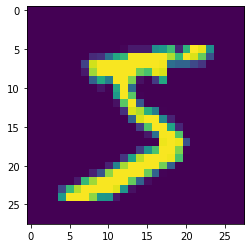

In [4]:
plt.imshow(x_train[0])

In [5]:
y_train==0

array([False,  True, False, ..., False, False, False])

In [6]:
only_zeros=x_train[y_train==0]

In [7]:
only_zeros.shape

(5923, 28, 28)

In [8]:
x_train.shape

(60000, 28, 28)

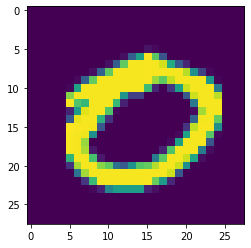

In [9]:
plt.imshow(only_zeros[14])

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [11]:
discriminator=Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
#Final output layer
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [12]:
codings_size=100
#100--150-->784
generator=Sequential()
generator.add(Dense(100,activation='relu',input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

In [13]:
GAN=Sequential([generator,discriminator])

In [14]:
discriminator.trainable=False

In [15]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [16]:
batch_size=32

In [17]:
#my_data=x_train
my_data=only_zeros

In [18]:
my_data.shape

(5923, 28, 28)

In [19]:
5923/32

185.09375

In [20]:
dataset=tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [21]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [22]:
dataset=dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [23]:
epochs=1

In [24]:
GAN.layers[0].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 150)               15150     
                                                                 
 dense_5 (Dense)             (None, 784)               118384    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [25]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [30]:
for epoch in range(epochs):
  print(f"Currently on Epoch {epoch+1}")
  i=0
  for x_batch in dataset:
    i=i+1
    if i%100==0:
      print(f"\t Currently on batch number {i} of (len(my_data)//batch_size)")
    
    #Discrimnator training phase
    noise=tf.random.normal(shape=[batch_size,codings_size])
    gen_images=generator(noise)
    x_fake_vs_real=tf.concat([gen_images,tf.dtypes.cast(x_batch,tf.float32)],axis=0)
    y1=tf.constant([[0.0]]*batch_size+[[1.0]]*batch_size)
    discriminator.trainable=True
    discriminator.train_on_batch(x_fake_vs_real,y1)

    #Train Generator

    noise=tf.random.normal(shape=[batch_size,codings_size])
    y2=tf.constant([[1.0]]*batch_size)
    discriminator.trainable=False
    GAN.train_on_batch(noise,y2)


Currently on Epoch 1
	 Currently on batch number 100 of (len(my_data)//batch_size)


In [31]:
noise=tf.random.normal(shape=[10,codings_size])

In [32]:
noise.shape

TensorShape([10, 100])

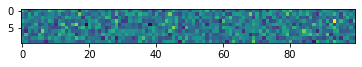

In [33]:
plt.imshow(noise)

In [34]:
images=generator(noise)

In [35]:
images.shape

TensorShape([10, 28, 28])

In [37]:
images[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

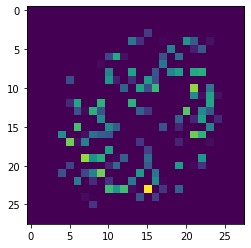

In [38]:
plt.imshow(images[0])

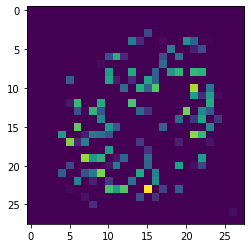

In [39]:
plt.imshow(images[1])

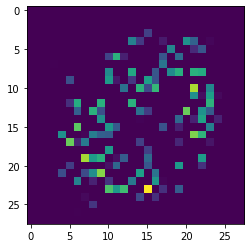

In [40]:
plt.imshow(images[4])